In [7]:
def read_transcript_from_id(transcript_id):

    path_to_data_folder = '/archive/shared/sim_center/shared/ameer/'
    # lookinto this dictionary to find the path
    # can also manually create the path and it would be faster but not by much
    merged_lookup = pd.read_csv(path_to_data_folder + 'grade_lookupv5.csv')
    transcript = ''

    path = merged_lookup[merged_lookup.id == transcript_id].path.iloc[0]
    with open(path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if line != '\n':
            tok_line = line.split(' ')
            for i in range(len(tok_line)):
                transcript += ' ' + tok_line[i]


    return transcript

In [8]:
def reconstruct_transcript(path, id): 
    path = path + id + '.txt'
    with open(path, 'r') as file:
        lines = file.readlines()
 
    out = []
    
    for line in lines:
        if line.find(':')==-1: continue
        temp = {}
        temp['speaker'] = line[:line.find(':')]
        temp['text'] = line[line.find(':') + 1: ]
        out.append(temp)

    return out

In [9]:
def consolidate_transcript(transcript):
    
    new = []
    new.append({'speaker': transcript[0]['speaker'], 'text': transcript[0]['text']})
    
    for i in range(1, len(transcript)):
        this = {}
        if transcript[i]['speaker'] == transcript[i-1]['speaker']:
            new[-1]['text'] += transcript[i]['text']
        else:
            this['speaker'] = transcript[i]['speaker']
            this['text'] = transcript[i]['text']
            new.append(this)
    
    return new

In [10]:
def extract_text(transcript):
    out = ''
    for line in transcript:
        out += line['speaker'] + line['text']
    return out

In [11]:
id_set1 = ['01_0542_298135',
'02_0036_174595',
'03_0028_174553',
'04_0043_174686',
'05_0033_174804',
'06_0079_175106',
'07_0068_174641',
'08_0029_174576',
'09_0029_174582',
'10_0991_331330']

id_set2 = ['01_1080_366142',
           '02_1056_380177',
           '03_1500_380168',
           '04_1512_380182',
           '05_1066_380195',
           '06_1048_365209',
           '07_1111_380134',
           '08_1044_380133',
           '09_1039_380193',
           '10_1005_331402'
]

In [12]:
gold_path = '/archive/shared/sim_center/shared/annie/gold-standards/gpt4-gold-standard-diarized/'
gold_transcript = extract_text(consolidate_transcript(reconstruct_transcript(gold_path, id_set1[0])))
diar_path = '/archive/shared/sim_center/shared/annie/experiments/gpt4_3chunk_pass2/'
diar_transcript = extract_text(consolidate_transcript(reconstruct_transcript(diar_path, id_set1[0])))

In [13]:
diar_transcript

"ID 01_0542_298135\nInstructions Learners, you may begin your patient station. Please remove your cover sheet, jot down any notes, knock, and then enter. Thank you.\nPatient so so I don't know. Hello?\nStudent Hi, this is Mrs. Miller.\nPatient Yes, yes it is.\nStudent Hi Mrs Miller, my name is Jackson Agroz. I'm the medical student working at the clinic today. I am calling to speak about your daughter. What was your name again?\nPatient Jackson Agrroz.\nStudent Okay. Your S-47024. That's your OSCE number?\nPatient 427024, yes.\nStudent Okay, well, OSCENumber21, sorry. There we go, thank you. Well, I am glad you called. I was very worried because my daughter has had a cough for a long time, and it just seems it won't go away.\nPatient Okay. How long has it been going on for?\nStudent Five weeks is when it started.\nPatient Okay, and can you describe the cough to me?\nStudent It's a dry cough that's almost nonstop.\nPatient Okay?\nStudent And you said it's been getting worse over these f

In [14]:
import difflib
'''
cases=[(gold_transcript, diar_transcript)] 

y = cases[0][0]
x = cases[0][1]

diff = difflib.SequenceMatcher(None, x, y)

for tag, x_start, x_end, y_start, y_end in diff.get_opcodes():
    if tag == 'insert':
        print(y[y_start:y_end].casefold())'''

"\ncases=[(gold_transcript, diar_transcript)] \n\ny = cases[0][0]\nx = cases[0][1]\n\ndiff = difflib.SequenceMatcher(None, x, y)\n\nfor tag, x_start, x_end, y_start, y_end in diff.get_opcodes():\n    if tag == 'insert':\n        print(y[y_start:y_end].casefold())"

In [10]:
'''x = cases[0][0]
y = cases[0][1]

diff = difflib.SequenceMatcher(None, x, y)

for tag, x_start, x_end, y_start, y_end in diff.get_opcodes():
    if tag == 'insert':
        print(y[y_start:y_end].casefold())'''

"x = cases[0][0]\ny = cases[0][1]\n\ndiff = difflib.SequenceMatcher(None, x, y)\n\nfor tag, x_start, x_end, y_start, y_end in diff.get_opcodes():\n    if tag == 'insert':\n        print(y[y_start:y_end].casefold())"

In [11]:
'''ndiff = difflib.ndiff(cases[0][0].splitlines(keepends=True), cases[0][1].splitlines(keepends=True))
print(''.join(ndiff), end='')'''

"ndiff = difflib.ndiff(cases[0][0].splitlines(keepends=True), cases[0][1].splitlines(keepends=True))\nprint(''.join(ndiff), end='')"

In [17]:
'''ratio = difflib.SequenceMatcher(None, x, y).ratio()
ratio'''

0.9178462392450736

In [15]:
import pandas as pd

def diff_ratio(gold_path, diar_path, ids):
    scores = []
    for id in ids:
        gold_transcript = extract_text(consolidate_transcript(reconstruct_transcript(gold_path, id)))
        diar_transcript = extract_text(consolidate_transcript(reconstruct_transcript(diar_path, id)))
        ratio = difflib.SequenceMatcher(None, gold_transcript, diar_transcript).ratio()
        scores.append(ratio)
    return scores

def save_scores(scores, path, run_name, ids):
    df = pd.DataFrame((ids, scores))
    df.to_csv(path + run_name + '.csv')
    



In [16]:
#scores = diff_ratio(gold_path, diar_path, id_set1)
path = '/archive/shared/sim_center/shared/annie/evaluation/diff_scores/'
#save_scores(scores, path, 'gpt4_3chunk_pass2', id_set1)

In [30]:
runs = ['claude-opus',
        'claude-opus-nosum',
        'llama-8B-instruct',
        'llama-70B-instruct',
        'claude-sonnet',
        'gpt4o',
        'gpt4o-nosum',
        'GPT3.5 complete',
        'GPT4 3-chunk',
        'GPT4 6-chunk',
        'gpt4_3chunk_pass2',
        'gpt4-1chunk',
        'gpt4-1chunk-nosum',
        'gpt4-3chunk-nosum',
        ]

complete = ['claude-opus',
        'claude-sonnet',
        'gpt4o',
        'GPT4 3-chunk',
        'GPT4 6-chunk',
        'gpt4_3chunk_pass2',
        'gpt4-1chunk',
        ]

In [18]:
'''gold_path = '/archive/shared/sim_center/shared/annie/gold-standards/gpt4-gold-standard-diarized/'
diar_path = '/archive/shared/sim_center/shared/annie/experiments/'
for run in runs:
    this_path = diar_path + run + '/'
    scores = diff_ratio(gold_path, this_path, id_set1)
    path = '/archive/shared/sim_center/shared/annie/evaluation/diff_scores/'
    save_scores(scores, path, run, id_set1)'''


KeyboardInterrupt: 

In [19]:
diar_path = '/archive/shared/sim_center/shared/annie/experiments/'
scores = diff_ratio(gold_path, gold_path, id_set1)
path = '/archive/shared/sim_center/shared/annie/evaluation/diff_scores/'
save_scores(scores, path, 'gpt4-gold-standard', id_set2)

In [53]:
for run in complete:
    this_path = diar_path + run + '/'
    scores = diff_ratio(gold_path, this_path, id_set1)
    path = '/archive/shared/sim_center/shared/annie/evaluation/diff_scores/'
    save_scores(scores, path, run, id_set1)

In [64]:
for run in complete[1:]:
    this_path = diar_path + run + '/'
    scores = diff_ratio(gold_path, this_path, id_set2)
    path = '/archive/shared/sim_center/shared/annie/evaluation/diff_scores/'
    df = pd.read_csv(path + run + '.csv')
    df_2 = pd.DataFrame((id_set2, scores))
    pd.concat((df, df_2), axis=1).to_csv(path + run + '.csv')

In [80]:
big_df = pd.read_csv(path + runs[0] + '.csv')
for run in runs[1:]:
    df = pd.read_csv(path + run + '.csv')
    big_df = pd.concat((big_df, df[1:]))

In [87]:
big_df = big_df.drop('Unnamed: 0.1', axis=1)
big_df = big_df.drop('Unnamed: 0', axis=1)

In [88]:
big_df.columns = id_set1 + id_set2

In [91]:
big_df = big_df.drop(0)

In [93]:
big_df.index = runs

In [95]:
big_df.to_csv(path + 'all.csv')

In [96]:
big_df

,01_0542_298135,02_0036_174595,03_0028_174553,04_0043_174686,05_0033_174804,06_0079_175106,07_0068_174641,08_0029_174576,09_0029_174582,10_0991_331330,01_1080_366142,02_1056_380177,03_1500_380168,04_1512_380182,05_1066_380195,06_1048_365209,07_1111_380134,08_1044_380133,09_1039_380193,10_1005_331402
claude-opus,0.6551391567925048,0.7695889531149647,0.8802551086815046,0.7499553810458682,0.09421602787456446,0.8290625667307282,0.8976281184711811,0.25574475119854523,0.8127788854077661,0.4964940192092393,0.5668285912560722,0.12204845139527752,0.8917624949662177,0.771353251318102,0.25827121747090365,0.42559744481834255,0.8368496517820565,0.1866907170005798,0.6496487582863362,0.9243299813441325
claude-opus-nosum,0.6470104223806912,0.7629519643645412,0.9086684309042794,0.7407080816542481,0.7563465783664459,0.7994455698901802,0.8016309384073639,0.6483214977404778,0.7944701330565255,0.45754000700852704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
llama-8B-instruct,0.6466522376597081,0.6916859591405711,0.8448478516390231,0.6086316370663477,0.09053040821993891,0.8127650320756769,0.7901189829075316,0.10539101186583201,0.5950237196243586,0.3290249568169635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
llama-70B-instruct,0.7037914691943128,0.4643179057099189,0.869659620665432,0.7760279965004374,0.23542290009486974,0.8189122711123258,0.9311487481590575,0.36562272396212675,0.6934126725861187,0.3022630918970562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
claude-sonnet,0.7093498801297419,0.7028644378839862,0.3755123284106434,0.7741161840469,0.09676523670692767,0.7899771714316773,0.8164050381584662,0.23510310115278454,0.8073140456411725,0.206789385608415,0.4210750248191746,0.11580905145691259,0.11179676591144543,0.11052181351582549,0.3553094462540717,0.24776238526879882,0.754345247305173,0.18223145863099105,0.6660746003552398,0.8135779312868842
gpt4o,0.48063527444970744,0.7807625649913345,0.9523378971841902,0.882047216349542,0.7262615859938208,0.8192026037428803,0.9635178756318898,0.5111038536903985,0.7865689288247812,0.7741898215007799,0.6960388588629678,0.08372035420149855,0.5872613165976766,0.7463910480908857,0.7988675846094454,0.8628945123684959,0.8967530472190925,0.2018455184874492,0.6997806483061175,0.88282736746715
gpt4o-nosum,0.8990499624085845,0.8747623574144486,0.9428109854604201,0.832743675924288,0.8936257710760795,0.8141236348213339,0.9654036243822076,0.6953796705504218,0.8602394812816508,0.797323025442797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPT3.5 complete,0.026067013481009118,0.1156558533145275,0.6289994087116484,0.21318479260180628,0.04960103515203795,0.35458476549506596,0.563754127508255,0.15048197072474118,0.29653908116215766,0.5108995584988962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPT4 3-chunk,0.9763616256566215,0.8149121758872028,0.9797284252525903,0.8935488179511153,0.9389411048752451,0.8914554593091648,0.8260762607626077,0.7644775153671951,0.9610475248457444,0.9254069524774909,0.9478606826272074,0.9347293656625031,0.8404536692518043,0.8417792308354125,0.9615259845584896,0.3068704892879468,0.8678063555624005,0.2372968458919509,0.8025874227907203,0.8926610541727672
GPT4 6-chunk,0.8945429740791269,0.7089732904710878,0.9222045237336731,0.6681478848204764,0.7564649426819515,0.8932070017665007,0.5041533945412529,0.2229222195299249,0.8905542986425339,0.801841169958632,0.760551724137931,0.1069255822528114,0.6360257139108759,0.23337926283155355,0.8578838174273858,0.22709999432817196,0.6061910619106191,0.25542570951585974,0.6099749889657202,0.8258322357963577


In [126]:
import numpy as np
means = []
for run in runs:
    this = list(big_df.loc[run])
    this = [float(i) for i in this]
    means.append(np.nanmean(this)) 

In [127]:
means

[0.6037121764082445,
 0.731709362377328,
 0.5514671797015952,
 0.6160579399881655,
 0.4646350266987615,
 0.7066503939285053,
 0.8575462188762233,
 0.29097676066501454,
 0.8302763481513091,
 0.6191150895651225,
 0.7554428517250384,
 0.6739246269873832,
 0.7486537327951404,
 0.7987476277805524]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'claude-opus'),
  Text(1, 0, 'claude-opus-nosum'),
  Text(2, 0, 'llama-8B-instruct'),
  Text(3, 0, 'llama-70B-instruct'),
  Text(4, 0, 'claude-sonnet'),
  Text(5, 0, 'gpt4o'),
  Text(6, 0, 'gpt4o-nosum'),
  Text(7, 0, 'GPT3.5 complete'),
  Text(8, 0, 'GPT4 3-chunk'),
  Text(9, 0, 'GPT4 6-chunk'),
  Text(10, 0, 'gpt4_3chunk_pass2'),
  Text(11, 0, 'gpt4-1chunk'),
  Text(12, 0, 'gpt4-1chunk-nosum'),
  Text(13, 0, 'gpt4-3chunk-nosum')])

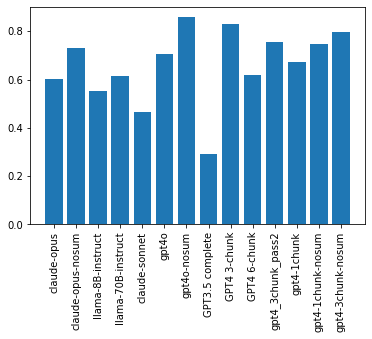

In [130]:
import matplotlib.pyplot as plt
plt.bar(runs, means)
plt.xticks(rotation='vertical')

In [26]:
'''import difflib

def diff_strings(a: str, b: str, *, use_loguru_colors: bool = False) -> str:
    output = []
    matcher = difflib.SequenceMatcher(None, a, b)
    if use_loguru_colors:
        green = '<GREEN><black>'
        red = '<RED><black>'
        endgreen = '</black></GREEN>'
        endred = '</black></RED>'
    else:
        green = '\x1b[38;5;16;48;5;2m'
        red = '\x1b[38;5;16;48;5;1m'
        endgreen = '\x1b[0m'
        endred = '\x1b[0m'

    for opcode, a0, a1, b0, b1 in matcher.get_opcodes():
        if opcode == 'equal':
            output.append(a[a0:a1])
        elif opcode == 'insert':
            output.append(f'{green}{b[b0:b1]}{endgreen}')
        elif opcode == 'delete':
            output.append(f'{red}{a[a0:a1]}{endred}')
        elif opcode == 'replace':
            output.append(f'{green}{b[b0:b1]}{endgreen}')
            output.append(f'{red}{a[a0:a1]}{endred}')
    return ''.join(output)

print(diff_strings(cases[0][0], cases[0][1]))

from loguru import logger
logger.opt(raw=True, colors=True).info(diff_strings(cases[0][0], cases[0][1], use_loguru_colors=True))'''

ID 01_0542_298135
Instructions Learners, you may begin your patient station. Please remove your cover sheet, jot down any notes, knock, and then enter. Thank you.
Patient so so I don't know. Hello?
Student Hi, this is Mrs. Miller.
Patient Yes, yes it is.
Student Hi Mrs Miller, my name is Jackson Agroz. I'm the medical student working at the clinic today. I am calling to speak about your daughter. What was your name again?
Patient Jackson Agrroz.What was your name again?
Student Jackson Agrroz.
 Okay. Your S-47024. 
Patient That's your OSCE number?
PatiStudent 427024, yes.
Student Okay, well, OSCENumber21, sorry. There we go, thank you. Well, I am glad you called. I was very worried because my daughter has had a cough for a long time, and it just seems it won't go away.
Patient Okay. HoThere w long has it been going on for?
Student Five weeks is when it started.
Patient Okay, and can you describe the cough to me?
Student It's a dry cough that's almost nonstop.
Patient Okay?
Student And 

ID 01_0542_298135
Instructions Learners, you may begin your patient station. Please remove your cover sheet, jot down any notes, knock, and then enter. Thank you.
Patient so so I don't know. Hello?
Student Hi, this is Mrs. Miller.
Patient Yes, yes it is.
Student Hi Mrs Miller, my name is Jackson Agroz. I'm the medical student working at the clinic today. I am calling to speak about your daughter. What was your name again?
Patient Jackson Agrroz.What was your name again?
Student Jackson Agrroz.
 Okay. Your S-47024. 
Patient That's your OSCE number?
PatiStudent 427024, yes.
Student Okay, well, OSCENumber21, sorry. There we go, thank you. Well, I am glad you called. I was very worried because my daughter has had a cough for a long time, and it just seems it won't go away.
Patient Okay. HoThere w long has it been going on for?
Student Five weeks is when it started.
Patient Okay, and can you describe the cough to me?
Student It's a dry cough that's almost nonstop.
Patient Okay?
Student And 